## INTRODUCTION
Capstone project for Google Data Analytics Professional Certificate. Avocado are tasty and healthy and a super food with lots of offers: for example avocado cream, salads, smoothies, snacks and even sweet food.The dataset was proposed by the Google Growth Team and is spanning from January 4, 2015 to March 25, 2018,comprising of 18,249 observations and 14 columns.the data is made available on kaggle by Justin Kiggins. In this study I will be analysing historic data on avocado price and sales volume in multiple US regions. In this light, I will be making recommendation for better marketing strategies.

# Business Objective

Aanalyse the price of avocado which is continuous in nature of the two different types of avocado using the region in which they are sold. To answer questions like:

1) How is the distribution of avocado price across the years.

2) which avocado type has the highest price and which has the lowest price.

3) which type of avocado is in high demand or mostly bought.

4) Which regions have the lowest and highest avocado prices.

5) in which month and year was the most avocado sold.

## Location of Data

Avocado Price, originally from Hass Avocado Board and (made available by Justin Kiggins on Kaggle under a CC0 license): Historical data about avocado prices and sales in grocery stores throughout the United States. The data includes information about the price of (Hass) avocados and the amount sold at different points in time (2015 -2018).

## Process and Clean
In this analysis, I used Python and Jupyter Notebook to analyse, clean, perform summarisations and visualisations of the data. I choosed Python because of it ease of use and versatility as the best tool for this project.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv(r"Downloads/avocado.csv")
dataset.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
dataset.drop("Unnamed: 0", axis=1, inplace =True) # droping the unamed feature from the data

In [50]:
dataset.duplicated().isna().sum() #Checking for duplicates in our data set

0

In [5]:
dataset.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [10]:
dataset.isna().sum() # we can see we have no missing values in the data

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [11]:
#converting date column to date format and extracting the month
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['month'] = dataset['Date'].dt.month
dataset.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


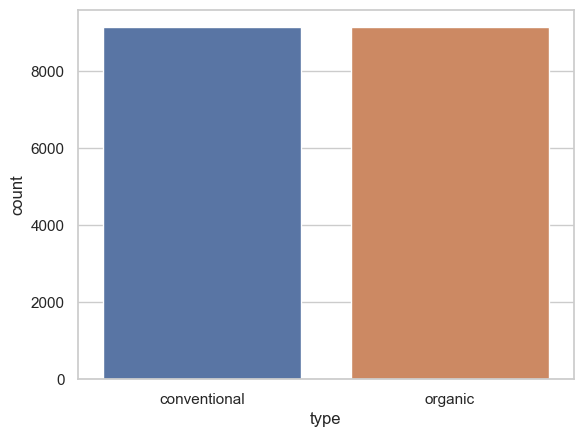

In [41]:
sns.countplot(data=dataset, x='type')
plt.show()# We can see that we have more conventional avocado in the date

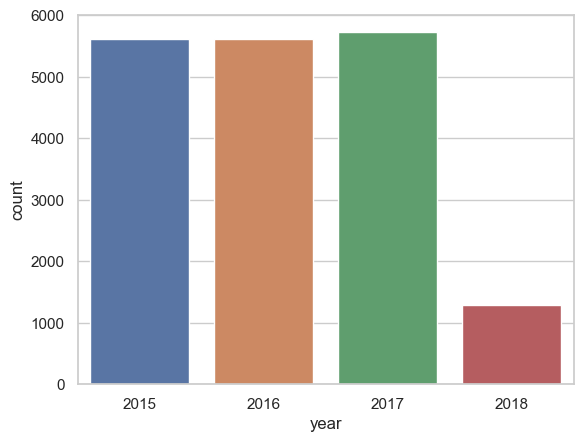

In [37]:
sns.countplot(data=dataset, x='year')
plt.show()

#### This shows that more avocado was bought in 2017 and less e=was bought in 2018, note the data was collected in 2018 May. that would effect the number if avocado bought

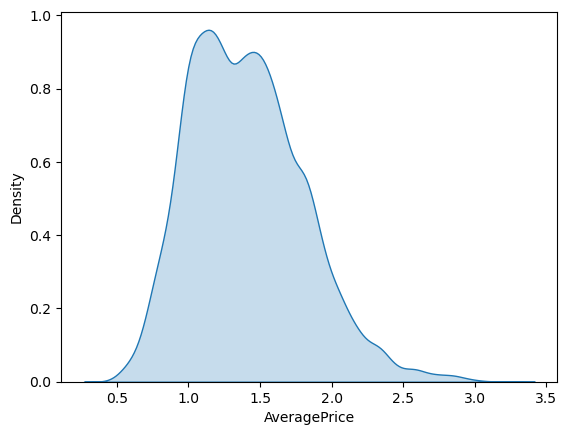

In [15]:
sns.kdeplot(data=dataset, x='AveragePrice', fill=True)
plt.show()

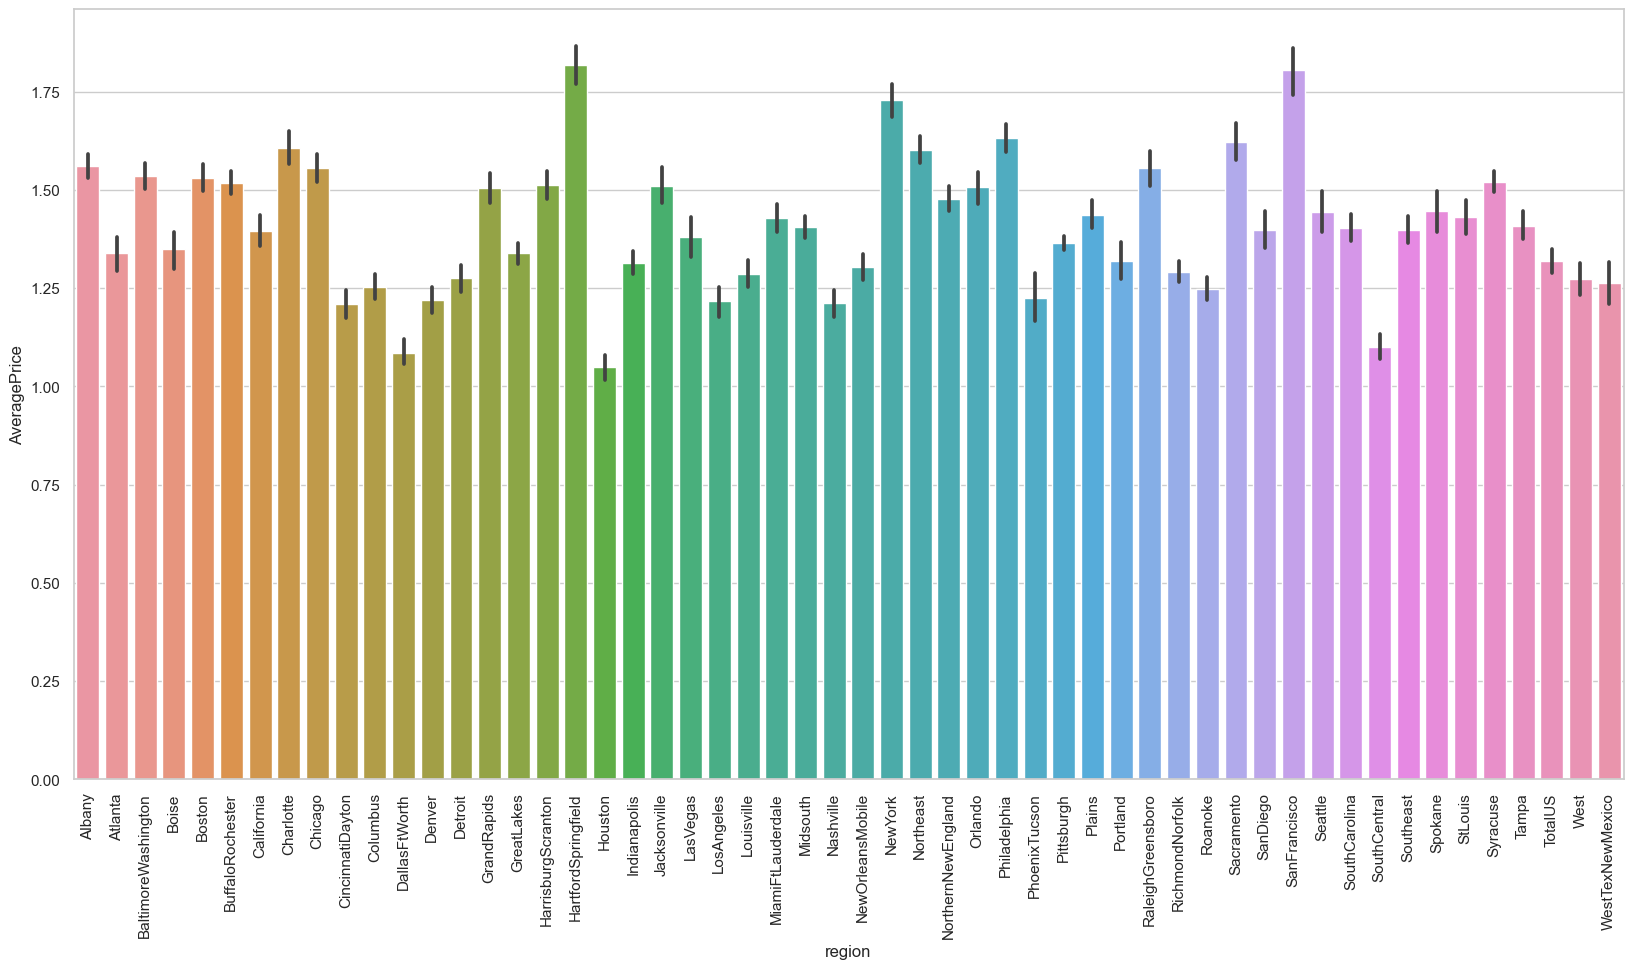

In [36]:
sns.set(style='whitegrid')
plt.figure(figsize=(20, 10))
sns.barplot(data=dataset, x='region', y='AveragePrice')
plt.xticks(rotation=90)
plt.show()

##### The distribution of the Averageprice against the region, we can see that harlfordspringfield and Sanfransico  has the highest Averageprice distribution among the regions the consume Avocado, while Houston and DallasFtworth are the lowest region 

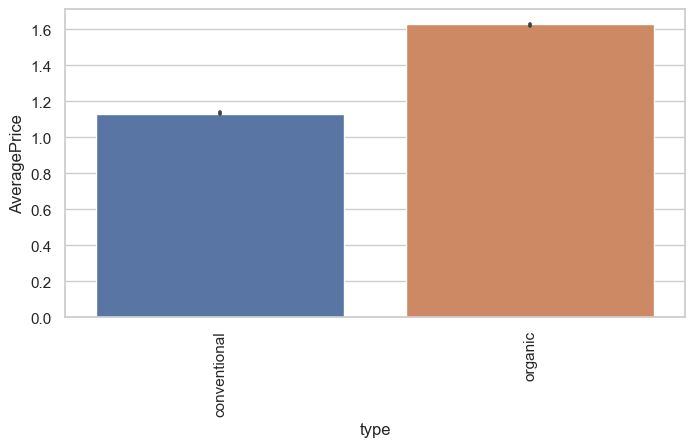

In [45]:
sns.set(style='whitegrid')
plt.figure(figsize=(8, 4))
sns.barplot(data=dataset, x='type', y='AveragePrice', estimator='median')
plt.xticks(rotation=90)
plt.show()

#### 

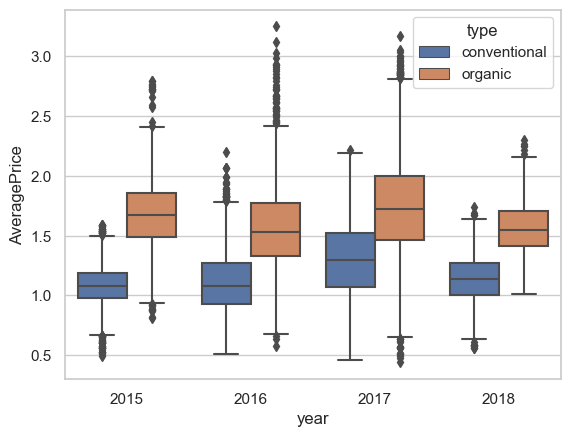

In [46]:
sns.boxplot(data=dataset, x='year', y='AveragePrice', hue='type')
plt.show()

#### We can see from the above diagram, that the year 2017 has the highest AveragePrice of the two types of Avocado.

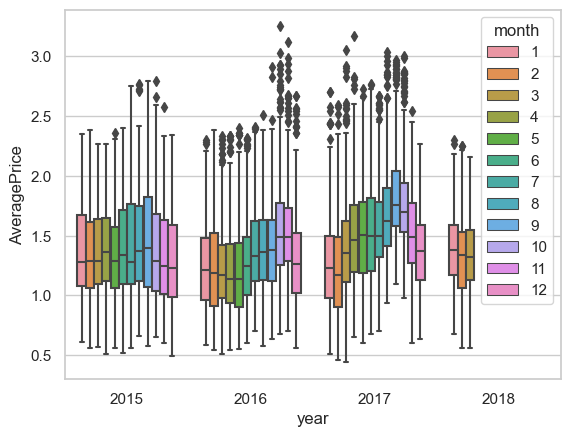

In [51]:
sns.boxplot(data=dataset, x='year', y='AveragePrice', hue='month')
plt.show()

#### From the above we can clearly see that in September of 2017 has the AveragePrice of Avocado 